In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff
import plotly.express as px


In [43]:

# Importing dataset and examining it
dataset = pd.read_csv("Drink.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
(4898, 1

In [ ]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap_drink.html')

In [14]:
#define functions to reuse
def plot_elbow(dataset,columnToConvert, mean):
    #creating a subset5 without Y as
    subset = dataset;
    print(subset)
    subset.info()
    print(subset.describe())

    # Defining ca
    def converter(column):
        if column <= mean:
            return 0 # low
        else:
            return 1 # high

    subset[columnToConvert] = subset[columnToConvert].apply(converter)



    feature_scaler = StandardScaler()
    subset_scaled = feature_scaler.fit_transform(subset)
    print(subset_scaled)

    # Finding the number of clusters (K) - Elbow Plot Method
    inertia_subset = []
    for i in range(1,11):
        kmeans_subset = KMeans(n_clusters = i, random_state = 100)
        kmeans_subset.fit(subset_scaled)
        inertia_subset.append(kmeans_subset.inertia_)

    plt.plot(range(1, 11), inertia_subset)
    plt.title('The Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    return subset_scaled


In [5]:

dataset = dataset.drop(['density'],axis=1)

feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(dataset)

In [6]:
# Analysis on Personal Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

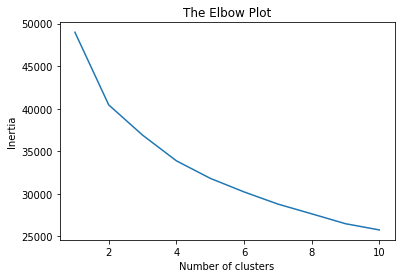

In [7]:
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =40,n_iter=3500)
x_tsne = tsne.fit_transform(X)



fixedacidity = list(dataset['fixed acidity'])
volatileacidity = list(dataset['volatile acidity'])
citricacid = list(dataset['citric acid'])
residualsugar = list(dataset['residual sugar'])
chlorides = list(dataset['chlorides'])
freesulfurdioxide = list(dataset['free sulfur dioxide'])
totalsulfurdioxide = list(dataset['total sulfur dioxide'])
#density = list(dataset['density'])
ph = list(dataset['pH'])
sulphates = list(dataset['sulphates'])
alcohol = list(dataset['alcohol'])
data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers', 
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'FA: {a} ; VA: {b}; CA:{c}; RS:{d}; C :{e}; FSD :{f}; TSD :{g};ph :{i};sulphates :{j};alcohol :{k}' for a,b,c,d,e,f,g,i,j,k in list(zip(fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,ph,sulphates,alcohol))],
                    hoverinfo='text')]



In [9]:
layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_fullset_per40_3500_1.html')

't-SNE_fullset_per40_3500_1.html'

In [10]:
#creating a subset
subset1 = dataset[['fixed acidity','alcohol','residual sugar']]
print(subset1)

      fixed acidity  alcohol  residual sugar
0               7.0      8.8            20.7
1               6.3      9.5             1.6
2               8.1     10.1             6.9
3               7.2      9.9             8.5
4               7.2      9.9             8.5
...             ...      ...             ...
4893            6.2     11.2             1.6
4894            6.6      9.6             8.0
4895            6.5      9.4             1.2
4896            5.5     12.8             1.1
4897            6.0     11.8             0.8

[4898 rows x 3 columns]


In [11]:
subset1.info()
print(subset1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fixed acidity   4898 non-null   float64
 1   alcohol         4898 non-null   float64
 2   residual sugar  4898 non-null   float64
dtypes: float64(3)
memory usage: 114.9 KB
       fixed acidity      alcohol  residual sugar
count    4898.000000  4898.000000     4898.000000
mean        6.854788    10.514267        6.391415
std         0.843868     1.230621        5.072058
min         3.800000     8.000000        0.600000
25%         6.300000     9.500000        1.700000
50%         6.800000    10.400000        5.200000
75%         7.300000    11.400000        9.900000
max        14.200000    14.200000       65.800000


In [12]:
# Defining residual sugar
def converter(column):
    if column <= 6.391415:
        return 0 # low
    else:
        return 1 # high

subset1['residual sugar'] = subset1['residual sugar'].apply(converter)

In [14]:
subset1.head()


,fixed acidity,alcohol,residual sugar
0,7.0,8.8,1
1,6.3,9.5,0
2,8.1,10.1,1
3,7.2,9.9,1
4,7.2,9.9,1


In [15]:
#subset_X = subset1.drop(['residual sugar'], axis = 1) # Features
#subset_Y = subset1['residual sugar'] # Labels
#print(subset_X)
#print(subset_Y)

#without dropping the Y variable. we scale the full subset.
feature_scaler = StandardScaler()
X_subset1_scaled = feature_scaler.fit_transform(subset1)
print(X_subset1_scaled)

[[ 0.17209696 -1.39315246  1.12540804]
 [-0.65750113 -0.82427568 -0.8885666 ]
 [ 1.4757511  -0.33666701  1.12540804]
 ...
 [-0.4204731  -0.90554379 -0.8885666 ]
 [-1.60561323  1.85757201 -0.8885666 ]
 [-1.01304317  1.04489089 -0.8885666 ]]


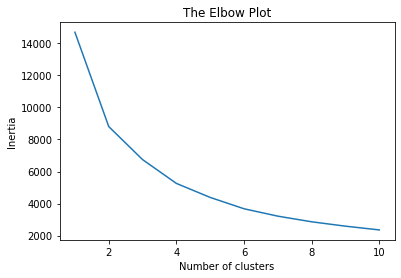

In [16]:

# Finding the number of clusters (K) - Elbow Plot Method
inertia_subset1 = []
for i in range(1,11):
    kmeans_subset1 = KMeans(n_clusters = i, random_state = 100)
    kmeans_subset1.fit(X_subset1_scaled)
    inertia_subset1.append(kmeans_subset1.inertia_)
    
plt.plot(range(1, 11), inertia_subset1)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Running KMeans to generate labels
kmeans_subset1 = KMeans(n_clusters = 2)
kmeans_subset1.fit(X_subset1_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset1 = TSNE(n_components = 2, perplexity =150,n_iter=2000)
x_tsne_subset1 = tsne_subset1.fit_transform(X_subset1_scaled)



fixedacidity = list(subset1['fixed acidity'])

residualsugar = list(subset1['residual sugar'])
alcohol = list(subset1['alcohol'])
data = [go.Scatter(x=x_tsne_subset1[:,0], y=x_tsne_subset1[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset1.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'FA: {a} ;  RS:{b}; alcohol :{c}' for a,b,c in list(zip(fixedacidity,residualsugar,alcohol))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE subset1_per40_2000 fixed acidity alcohol residual S', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset1_per40_2000.html')

't-SNE__subset1_per40_2000.html'

In [20]:
#creating a subset
subset2 = dataset[['fixed acidity','alcohol','total sulfur dioxide', 'pH','residual sugar']]
print(subset2)
subset1.info()
print(subset2.describe())
# Defining residual sugar
def converter(column):
    if column <= 6:
        return 0 # low
    else:
        return 1 # high

subset2['residual sugar'] = subset2['residual sugar'].apply(converter)

subset2_X = subset2.drop(['residual sugar'], axis = 1) # Features
subset2_Y = subset2['residual sugar'] # Labels
print(subset2_X)
print(subset2_Y)

feature_scaler = StandardScaler()
X_subset2_scaled = feature_scaler.fit_transform(subset2_X)
print(X_subset2_scaled)

      fixed acidity  alcohol  total sulfur dioxide    pH  residual sugar
0               7.0      8.8                 170.0  3.00            20.7
1               6.3      9.5                 132.0  3.30             1.6
2               8.1     10.1                  97.0  3.26             6.9
3               7.2      9.9                 186.0  3.19             8.5
4               7.2      9.9                 186.0  3.19             8.5
...             ...      ...                   ...   ...             ...
4893            6.2     11.2                  92.0  3.27             1.6
4894            6.6      9.6                 168.0  3.15             8.0
4895            6.5      9.4                 111.0  2.99             1.2
4896            5.5     12.8                 110.0  3.34             1.1
4897            6.0     11.8                  98.0  3.26             0.8

[4898 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 3 col

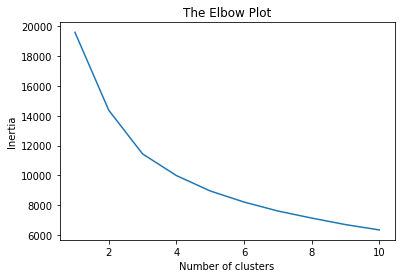

In [21]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia_subset2 = []
for i in range(1,11):
    kmeans_subset2 = KMeans(n_clusters = i, random_state = 100)
    kmeans_subset2.fit(X_subset2_scaled)
    inertia_subset2.append(kmeans_subset2.inertia_)
    
plt.plot(range(1, 11), inertia_subset2)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
# Running KMeans to generate labels
kmeans_subset2 = KMeans(n_clusters = 3)
kmeans_subset2.fit(X_subset2_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset2 = TSNE(n_components = 2, perplexity =90,n_iter=2000)
x_tsne_subset2 = tsne_subset2.fit_transform(X_subset2_scaled)



fixedacidity = list(subset2['fixed acidity'])
ph = list(subset2['pH'])
totalsulphurdioxide = list(subset2['total sulfur dioxide'])
residualsugar = list(subset2['residual sugar'])
alcohol = list(subset2['alcohol'])
data = [go.Scatter(x=x_tsne_subset2[:,0], y=x_tsne_subset2[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset2.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'FA: {a} ;  RS:{b}; alcohol :{c}; tsd :{d}; ph:{e}' for a,b,c,d,e in list(zip(fixedacidity,residualsugar,alcohol,totalsulphurdioxide,ph))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE with fixedacidity ph totalsulpd residuals alcohol. Y= RS', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset2_per30_2000.html')

't-SNE__subset2_per30_2000.html'

In [26]:
#creating a subset3
subset3 = dataset[['fixed acidity','alcohol','total sulfur dioxide', 'citric acid','residual sugar']]
print(subset3)
subset3.info()
print(subset3.describe())
# Defining ca
def converter(column):
    if column <= 0.33:
        return 0 # low
    else:
        return 1 # high

#subset3['citric acid'] = subset3['citric acid'].apply(converter)

#subset3_X = subset3.drop(['citric acid'], axis = 1) # Features
#subset3_Y = subset3['citric acid'] # Labels
#print(subset3_X)
#print(subset3_Y)

feature_scaler = StandardScaler()
X_subset3_scaled = feature_scaler.fit_transform(subset3)
print(X_subset3_scaled)

      fixed acidity  alcohol  total sulfur dioxide  citric acid  \
0               7.0      8.8                 170.0         0.36   
1               6.3      9.5                 132.0         0.34   
2               8.1     10.1                  97.0         0.40   
3               7.2      9.9                 186.0         0.32   
4               7.2      9.9                 186.0         0.32   
...             ...      ...                   ...          ...   
4893            6.2     11.2                  92.0         0.29   
4894            6.6      9.6                 168.0         0.36   
4895            6.5      9.4                 111.0         0.19   
4896            5.5     12.8                 110.0         0.30   
4897            6.0     11.8                  98.0         0.38   

      residual sugar  
0               20.7  
1                1.6  
2                6.9  
3                8.5  
4                8.5  
...              ...  
4893             1.6  
4894       

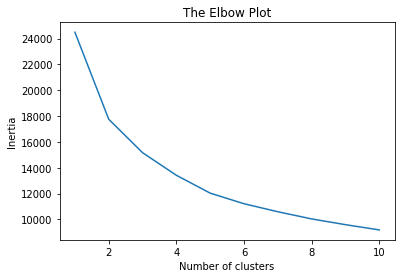

In [27]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia_subset3 = []
for i in range(1,11):
    kmeans_subset3 = KMeans(n_clusters = i, random_state = 100)
    kmeans_subset3.fit(X_subset3_scaled)
    inertia_subset3.append(kmeans_subset3.inertia_)
    
plt.plot(range(1, 11), inertia_subset3)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [28]:
# Running KMeans to generate labels
kmeans_subset3 = KMeans(n_clusters = 2)
kmeans_subset3.fit(X_subset3_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset3 = TSNE(n_components = 2, perplexity =70,n_iter=2000)
x_tsne_subset3 = tsne_subset3.fit_transform(X_subset3_scaled)



fixedacidity = list(subset3['fixed acidity'])
ca = list(subset3['citric acid'])
totalsulphurdioxide = list(subset3['total sulfur dioxide'])
residualsugar = list(subset3['residual sugar'])
alcohol = list(subset3['alcohol'])
data = [go.Scatter(x=x_tsne_subset3[:,0], y=x_tsne_subset3[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset3.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'FA: {a} ;  RS:{b}; alcohol :{c}; tsd :{d}; ca:{e}' for a,b,c,d,e in list(zip(fixedacidity,residualsugar,alcohol,totalsulphurdioxide,ca))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with fixedacidity totalsulpd residuals alcohol. Y= citric acid', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset3_per30_2000.html')

't-SNE__subset3_per30_2000.html'

      free sulfur dioxide  total sulfur dioxide  residual sugar
0                    45.0                 170.0            20.7
1                    14.0                 132.0             1.6
2                    30.0                  97.0             6.9
3                    47.0                 186.0             8.5
4                    47.0                 186.0             8.5
...                   ...                   ...             ...
4893                 24.0                  92.0             1.6
4894                 57.0                 168.0             8.0
4895                 30.0                 111.0             1.2
4896                 20.0                 110.0             1.1
4897                 22.0                  98.0             0.8

[4898 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  

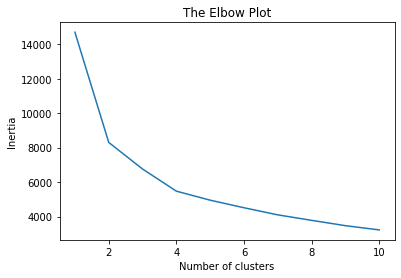

In [29]:
#creating a subset4 without Y
subset4 = dataset[['free sulfur dioxide','total sulfur dioxide','residual sugar']]
print(subset4)
subset4.info()
print(subset4.describe())



feature_scaler = StandardScaler()
X_subset4_scaled = feature_scaler.fit_transform(subset4)
print(X_subset4_scaled)

# Finding the number of clusters (K) - Elbow Plot Method
inertia_subset4 = []
for i in range(1,11):
    kmeans_subset4 = KMeans(n_clusters = i, random_state = 100)
    kmeans_subset4.fit(X_subset4_scaled)
    inertia_subset4.append(kmeans_subset4.inertia_)
    
plt.plot(range(1, 11), inertia_subset4)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
# Running KMeans to generate labels
kmeans_subset4 = KMeans(n_clusters = 4)
kmeans_subset4.fit(X_subset4_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset4 = TSNE(n_components = 2, perplexity =5,n_iter=2000)
x_tsne_subset4 = tsne_subset4.fit_transform(X_subset4_scaled)



free = list(subset4['free sulfur dioxide'])

totalsulphurdioxide = list(subset4['total sulfur dioxide'])
residualsugar = list(subset4['residual sugar'])

data = [go.Scatter(x=x_tsne_subset4[:,0], y=x_tsne_subset4[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset4.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'free: {a} ;  RS:{b};tsd :{d}; ' for a,b,d in list(zip(free,residualsugar,totalsulphurdioxide))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with freesulphur totalsulpd residuals alcohol. NO Y', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset4_per30_2000.html')

't-SNE__subset4_per30_2000.html'

      free sulfur dioxide  total sulfur dioxide  residual sugar  alcohol
0                    45.0                 170.0            20.7      8.8
1                    14.0                 132.0             1.6      9.5
2                    30.0                  97.0             6.9     10.1
3                    47.0                 186.0             8.5      9.9
4                    47.0                 186.0             8.5      9.9
...                   ...                   ...             ...      ...
4893                 24.0                  92.0             1.6     11.2
4894                 57.0                 168.0             8.0      9.6
4895                 30.0                 111.0             1.2      9.4
4896                 20.0                 110.0             1.1     12.8
4897                 22.0                  98.0             0.8     11.8

[4898 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 4 col

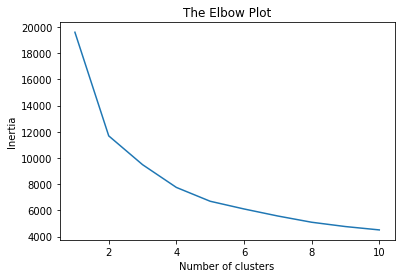

In [31]:
#creating a subset5 without Y as
subset5 = dataset[['free sulfur dioxide','total sulfur dioxide','residual sugar', 'alcohol']]
print(subset5)
subset5.info()
print(subset5.describe())

# Defining ca
def converter(column):
    if column <= 10:
        return 0 # low
    else:
        return 1 # high

subset5['alcohol'] = subset5['alcohol'].apply(converter)



feature_scaler = StandardScaler()
X_subset5_scaled = feature_scaler.fit_transform(subset5)
print(X_subset5_scaled)

# Finding the number of clusters (K) - Elbow Plot Method
inertia_subset5 = []
for i in range(1,11):
    kmeans_subset5 = KMeans(n_clusters = i, random_state = 100)
    kmeans_subset5.fit(X_subset5_scaled)
    inertia_subset5.append(kmeans_subset5.inertia_)
    
plt.plot(range(1, 11), inertia_subset5)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Running KMeans to generate labels
kmeans_subset5 = KMeans(n_clusters = 2)
kmeans_subset5.fit(X_subset5_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset5 = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne_subset5 = tsne_subset5.fit_transform(X_subset5_scaled)



free = list(subset5['free sulfur dioxide'])

totalsulphurdioxide = list(subset5['total sulfur dioxide'])
residualsugar = list(subset5['residual sugar'])
al = list(subset5['alcohol'])

data = [go.Scatter(x=x_tsne_subset5[:,0], y=x_tsne_subset5[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset5.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'free: {a} ;  RS:{b};tsd :{d}; al:{c} ' for a,b,d,c in list(zip(free,residualsugar,totalsulphurdioxide,al))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with freesulphur totalsulpd residuals Y= alcohol', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset5_per30_2000.html')

't-SNE__subset5_per30_2000.html'

In [29]:
#creating a subset5 without Y as alcohol
subset6 = dataset[['total sulfur dioxide','residual sugar', 'alcohol','free sulfur dioxide']]

subset6.info()
print(subset6.describe())
subset6.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total sulfur dioxide  4898 non-null   float64
 1   residual sugar        4898 non-null   float64
 2   alcohol               4898 non-null   float64
 3   free sulfur dioxide   4898 non-null   float64
dtypes: float64(4)
memory usage: 153.2 KB
       total sulfur dioxide  residual sugar      alcohol  free sulfur dioxide
count           4898.000000     4898.000000  4898.000000          4898.000000
mean             138.360657        6.391415    10.514267            35.308085
std               42.498065        5.072058     1.230621            17.007137
min                9.000000        0.600000     8.000000             2.000000
25%              108.000000        1.700000     9.500000            23.000000
50%              134.000000        5.200000    10.400000            34.000000


,total sulfur dioxide,residual sugar,alcohol,free sulfur dioxide
0,170.0,20.7,8.8,45.0
1,132.0,1.6,9.5,14.0
2,97.0,6.9,10.1,30.0
3,186.0,8.5,9.9,47.0
4,186.0,8.5,9.9,47.0


In [30]:
# Defining tsd
def convertertsd(column):
    if column <= 108:
        return 0 # low
    elif column > 108 and column<167:
        return 1
    else:
        return 2 # high
subset6['total sulfur dioxide'] = subset6['total sulfur dioxide'].apply(convertertsd)

def converterfsd(column):
    if column <= 23:
        return 0 # low
    elif column > 23 and column<46:
        return 1
    else:
        return 2 # high
subset6['free sulfur dioxide'] = subset6['free sulfur dioxide'].apply(converterfsd)
    

def converterrs(column):
    if column <= 2:
        return 0 # low
    elif column >2 and column <10:
        return 1
    else:
        return 2 # high
subset6['residual sugar'] = subset6['residual sugar'].apply(converterrs)


    


In [35]:
print(pd.Series(subset6['free sulfur dioxide']).value_counts())
print(pd.Series(subset6['residual sugar']).value_counts())
print(pd.Series(subset6['total sulfur dioxide']).value_counts())

1    2415
2    1242
0    1241
Name: free sulfur dioxide, dtype: int64
1    2187
0    1500
2    1211
Name: residual sugar, dtype: int64
1    2412
2    1251
0    1235
Name: total sulfur dioxide, dtype: int64


[[ 1.39907948e+00  1.42794756e+00 -1.39315246e+00 -2.86749235e-04]
 [-4.58526664e-03 -1.26882790e+00 -8.24275678e-01 -1.40478450e+00]
 [-1.40825002e+00  7.95598312e-02 -3.36667007e-01 -2.86749235e-04]
 ...
 [-4.58526664e-03 -1.26882790e+00 -9.05543789e-01 -2.86749235e-04]
 [-4.58526664e-03 -1.26882790e+00  1.85757201e+00 -1.40478450e+00]
 [-1.40825002e+00 -1.26882790e+00  1.04489089e+00 -1.40478450e+00]]


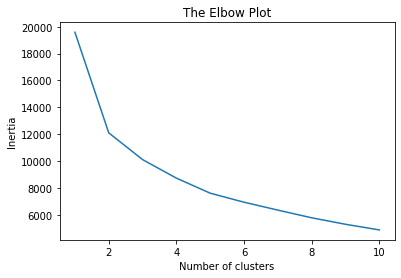

In [31]:
feature_scaler = StandardScaler()
X_subset6_scaled = feature_scaler.fit_transform(subset6)
print(X_subset6_scaled)

# Finding the number of clusters (K) - Elbow Plot Method
inertia_subset6 = []
for i in range(1,11):
    kmeans_subset6 = KMeans(n_clusters = i, random_state = 100)
    kmeans_subset6.fit(X_subset6_scaled)
    inertia_subset6.append(kmeans_subset6.inertia_)
    
plt.plot(range(1, 11), inertia_subset6)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Running KMeans to generate labels
kmeans_subset6 = KMeans(n_clusters = 2)
kmeans_subset6.fit(X_subset6_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset6 = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne_subset6 = tsne_subset6.fit_transform(X_subset6_scaled)



fsd = list(subset6['free sulfur dioxide'])
#ph = list(subset6['pH'])

totalsulphurdioxide = list(subset6['total sulfur dioxide'])
residualsugar = list(subset6['residual sugar'])
al = list(subset6['alcohol'])

data = [go.Scatter(x=x_tsne_subset6[:,0], y=x_tsne_subset6[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset6.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'  RS:{b};tsd :{d}; al:{c} ; fsd:{e}' for b,d,c,e in list(zip(residualsugar,totalsulphurdioxide,al,fsd))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with freesulphur totalsulpd residuals fsd all converted Y= alcohol', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset6_per60_4000_noph.html')

't-SNE__subset6_per60_4000_noph.html'

      fixed acidity  alcohol  total sulfur dioxide    pH  residual sugar
0               7.0      8.8                 170.0  3.00            20.7
1               6.3      9.5                 132.0  3.30             1.6
2               8.1     10.1                  97.0  3.26             6.9
3               7.2      9.9                 186.0  3.19             8.5
4               7.2      9.9                 186.0  3.19             8.5
...             ...      ...                   ...   ...             ...
4893            6.2     11.2                  92.0  3.27             1.6
4894            6.6      9.6                 168.0  3.15             8.0
4895            6.5      9.4                 111.0  2.99             1.2
4896            5.5     12.8                 110.0  3.34             1.1
4897            6.0     11.8                  98.0  3.26             0.8

[4898 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 5 col

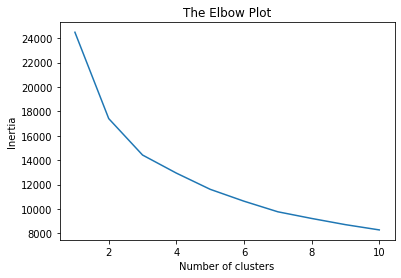

In [4]:
#creating a subset
subset7 = dataset[['fixed acidity','alcohol','total sulfur dioxide', 'pH','residual sugar']]
print(subset7)
subset7.info()
print(subset7.describe())
# Defining residual sugar
def converter(column):
    if column <= 6:
        return 0 # low
    else:
        return 1 # high

subset7['residual sugar'] = subset7['residual sugar'].apply(converter)



feature_scaler = StandardScaler()
X_subset7_scaled = feature_scaler.fit_transform(subset7)
print(X_subset7_scaled)

# Finding the number of clusters (K) - Elbow Plot Method
inertia_subset7 = []
for i in range(1,11):
    kmeans_subset7 = KMeans(n_clusters = i, random_state = 100)
    kmeans_subset7.fit(X_subset7_scaled)
    inertia_subset7.append(kmeans_subset7.inertia_)
    
plt.plot(range(1, 11), inertia_subset7)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Running KMeans to generate labels
kmeans_subset7 = KMeans(n_clusters = 3)
kmeans_subset7.fit(X_subset7_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset7 = TSNE(n_components = 2, perplexity =70,n_iter=2000)
x_tsne_subset7 = tsne_subset7.fit_transform(X_subset7_scaled)



#fsd = list(subset7['free sulfur dioxide'])
#ph = list(subset6['pH'])

totalsulphurdioxide = list(subset7['total sulfur dioxide'])
residualsugar = list(subset7['residual sugar'])
al = list(subset7['alcohol'])
fa = list(subset7['fixed acidity'])
ph = list(subset7['pH'])

data = [go.Scatter(x=x_tsne_subset7[:,0], y=x_tsne_subset7[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset7.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'  RS:{b};tsd :{d}; al:{c} ; fa:{f}; ph:{g}' for b,d,c,f,g in list(zip(residualsugar,totalsulphurdioxide,al,fa,ph))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with freesulphur totalsulpd residuals fsd all converted Y= rs', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset7_per70_2000.html')

't-SNE__subset7_per70_2000.html'

      alcohol  total sulfur dioxide  residual sugar
0         8.8                 170.0            20.7
1         9.5                 132.0             1.6
2        10.1                  97.0             6.9
3         9.9                 186.0             8.5
4         9.9                 186.0             8.5
...       ...                   ...             ...
4893     11.2                  92.0             1.6
4894      9.6                 168.0             8.0
4895      9.4                 111.0             1.2
4896     12.8                 110.0             1.1
4897     11.8                  98.0             0.8

[4898 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               4898 non-null   float64
 1   total sulfur dioxide  4898 non-null   float64
 2   residual sugar        4898 non-null 

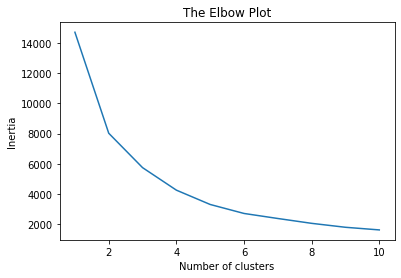

In [9]:
#creating a subset
subset8 = dataset[['alcohol','total sulfur dioxide','residual sugar']]
X_subset8_scaled = plot_elbow(subset8, 'total sulfur dioxide', 138 )

In [12]:
# Running KMeans to generate labels
kmeans_subset8 = KMeans(n_clusters = 2)
kmeans_subset8.fit(X_subset8_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset8 = TSNE(n_components = 2, perplexity =150,n_iter=2000)
x_tsne_subset8 = tsne_subset8.fit_transform(X_subset8_scaled)



#fsd = list(subset7['free sulfur dioxide'])
#ph = list(subset6['pH'])

totalsulphurdioxide = list(subset8['total sulfur dioxide'])
residualsugar = list(subset8['residual sugar'])
al = list(subset8['alcohol'])


data = [go.Scatter(x=x_tsne_subset8[:,0], y=x_tsne_subset8[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset8.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'  RS:{b};tsd :{d}; al:{c} ' for b,d,c in list(zip(residualsugar,totalsulphurdioxide,al))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with freesulphur totalsulpd residuals fsd all converted Y= rs', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset8_per150_2000.html')

't-SNE__subset8_per150_2000.html'

      alcohol  total sulfur dioxide  residual sugar    pH
0         8.8                 170.0            20.7  3.00
1         9.5                 132.0             1.6  3.30
2        10.1                  97.0             6.9  3.26
3         9.9                 186.0             8.5  3.19
4         9.9                 186.0             8.5  3.19
...       ...                   ...             ...   ...
4893     11.2                  92.0             1.6  3.27
4894      9.6                 168.0             8.0  3.15
4895      9.4                 111.0             1.2  2.99
4896     12.8                 110.0             1.1  3.34
4897     11.8                  98.0             0.8  3.26

[4898 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               4898 non-null   float64
 1   total sulfur di

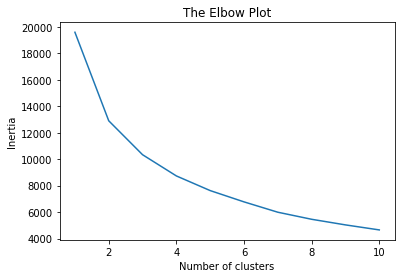

In [4]:
#creating a subset
subset9 = dataset[['alcohol','total sulfur dioxide','residual sugar','pH']]
print(subset9)
subset9.info()
print(subset9.describe())
# Defining residual sugar
def converter(column):
    if column <= 138:
        return 0 # low
    else:
        return 1 # high

subset9['total sulfur dioxide'] = subset9['total sulfur dioxide'].apply(converter)



feature_scaler = StandardScaler()
X_subset9_scaled = feature_scaler.fit_transform(subset9)
print(X_subset9_scaled)

# Finding the number of clusters (K) - Elbow Plot Method
inertia_subset9 = []
for i in range(1,11):
    kmeans_subset9 = KMeans(n_clusters = i, random_state = 100)
    kmeans_subset9.fit(X_subset9_scaled)
    inertia_subset9.append(kmeans_subset9.inertia_)
    
plt.plot(range(1, 11), inertia_subset9)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Running KMeans to generate labels
kmeans_subset9 = KMeans(n_clusters = 4)
kmeans_subset9.fit(X_subset9_scaled)
# Implementing t-SNE to visualize dataset
tsne_subset9 = TSNE(n_components = 2, perplexity =200,n_iter=2000)
x_tsne_subset9 = tsne_subset9.fit_transform(X_subset9_scaled)



#fsd = list(subset7['free sulfur dioxide'])
ph = list(subset9['pH'])

totalsulphurdioxide = list(subset9['total sulfur dioxide'])
residualsugar = list(subset9['residual sugar'])
al = list(subset9['alcohol'])


data = [go.Scatter(x=x_tsne_subset9[:,0], y=x_tsne_subset9[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset9.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'  RS:{b};tsd :{d}; al:{c}; ph:{e} ' for b,d,c,e in list(zip(residualsugar,totalsulphurdioxide,al,ph))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with freesulphur totalsulpd residuals fsd all converted Y= rs', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subsete_per200_2000.html')

't-SNE__subsete_per200_2000.html'

      alcohol  total sulfur dioxide  residual sugar    pH  citric acid
0         8.8                 170.0            20.7  3.00         0.36
1         9.5                 132.0             1.6  3.30         0.34
2        10.1                  97.0             6.9  3.26         0.40
3         9.9                 186.0             8.5  3.19         0.32
4         9.9                 186.0             8.5  3.19         0.32
...       ...                   ...             ...   ...          ...
4893     11.2                  92.0             1.6  3.27         0.29
4894      9.6                 168.0             8.0  3.15         0.36
4895      9.4                 111.0             1.2  2.99         0.19
4896     12.8                 110.0             1.1  3.34         0.30
4897     11.8                  98.0             0.8  3.26         0.38

[4898 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 5 columns):
 #   Column      

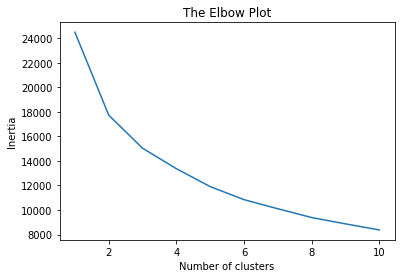

In [17]:
#creating a subset
subset9 = dataset[['alcohol','total sulfur dioxide','residual sugar','pH','citric acid']]
scaled = plot_elbow(subset9, 'total sulfur dioxide', 138 )


In [21]:
# Running KMeans to generate labels
kmeans_subset9 = KMeans(n_clusters = 3)
kmeans_subset9.fit(scaled)
# Implementing t-SNE to visualize dataset
tsne_subset9 = TSNE(n_components = 2, perplexity =100,n_iter=3000)
x_tsne_subset9 = tsne_subset9.fit_transform(scaled)



#fsd = list(subset7['free sulfur dioxide'])
ph = list(subset9['pH'])

totalsulphurdioxide = list(subset9['total sulfur dioxide'])
residualsugar = list(subset9['residual sugar'])
al = list(subset9['alcohol'])
ca = list(subset9['citric acid'])

data = [go.Scatter(x=x_tsne_subset9[:,0], y=x_tsne_subset9[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset9.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'  RS:{b};tsd :{d}; al:{c}; ph:{e}; ca:{f} ' for b,d,c,e,f in list(zip(residualsugar,totalsulphurdioxide,al,ph,ca))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with  totalsulpd residuals fsd all converted Y= tsd', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset9_per100_2000.html')

't-SNE__subset9_per100_2000.html'

      alcohol  total sulfur dioxide  residual sugar  free sulfur dioxide
0         8.8                 170.0            20.7                 45.0
1         9.5                 132.0             1.6                 14.0
2        10.1                  97.0             6.9                 30.0
3         9.9                 186.0             8.5                 47.0
4         9.9                 186.0             8.5                 47.0
...       ...                   ...             ...                  ...
4893     11.2                  92.0             1.6                 24.0
4894      9.6                 168.0             8.0                 57.0
4895      9.4                 111.0             1.2                 30.0
4896     12.8                 110.0             1.1                 20.0
4897     11.8                  98.0             0.8                 22.0

[4898 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 4 col

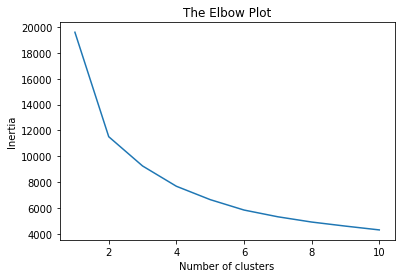

In [44]:
#creating a subset
subset10 = dataset[['alcohol','total sulfur dioxide','residual sugar','free sulfur dioxide']]
scaled = plot_elbow(subset10, 'total sulfur dioxide', 138 )

In [45]:
# Running KMeans to generate labels
kmeans_subset10 = KMeans(n_clusters = 3)
kmeans_subset10.fit(scaled)
# Implementing t-SNE to visualize dataset
tsne_subset10 = TSNE(n_components = 2, perplexity =50,n_iter=2000)
x_tsne_subset10 = tsne_subset10.fit_transform(scaled)



#fsd = list(subset7['free sulfur dioxide'])


totalsulphurdioxide = list(subset10['total sulfur dioxide'])
residualsugar = list(subset10['residual sugar'])
al = list(subset10['alcohol'])


fsd= list(subset10['free sulfur dioxide'])

data = [go.Scatter(x=x_tsne_subset10[:,0], y=x_tsne_subset10[:,1], mode='markers', 
                    marker = dict(color=kmeans_subset10.labels_, colorscale='Rainbow', opacity=0.5),
                    text=[f'  RS:{b};tsd :{d}; al:{c}; fsd:{g} ' for b,d,c,g in list(zip(residualsugar,totalsulphurdioxide,al,fsd))],
                    hoverinfo='text')]

layout = go.Layout(title = 't-SNE t-SNE with  totalsulpd residuals fsd all converted Y= tsd', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE__subset10_per50_2000.html')

't-SNE__subset10_per50_2000.html'